<a href="https://colab.research.google.com/github/OmarFG7/PC2/blob/master/PROTOTIPO_FINAL_GEPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Crear carpetas para  subir las imagenes de defectos
!mkdir defectos


In [2]:
#Crear carpetas para  subir las imagenes de prendas sin fallas
!mkdir ropa

In [9]:
#Entrar a la carpeta y descomprimir el archivo zip defectos

%cd defectos
!unzip Defectos.zip
%cd ..

/content/defectos
Archive:  Defectos.zip
  inflating: Defectos/0fa2d6237095801b2fbf20690bb09c2a.jpg  
  inflating: Defectos/1.jpg          
  inflating: Defectos/123123.PNG     
  inflating: Defectos/123asd.PNG     
  inflating: Defectos/20190508-19H2GwtWSAyDY6bHyVgp.jpg  
  inflating: Defectos/2132as.PNG     
  inflating: Defectos/2-hilos-sueltos-3.jpg  
  inflating: Defectos/2ljjn9y.jpg    
  inflating: Defectos/315cf10b951eb5cb9da35e415d66ed59.jpg  
  inflating: Defectos/4ca66a48adc0cf1c46a5fc91c67fe0f6.png  
  inflating: Defectos/5-1.jpg        
  inflating: Defectos/8438ac778c93529f785aca2492cc4e0e.jpg  
  inflating: Defectos/agujero.jpg    
  inflating: Defectos/agujero-ropa.jpg.jpg  
  inflating: Defectos/b8768213302399133c647b1d2d48829b--making-clothes-womens-jeans.jpg  
  inflating: Defectos/Captu2312ra.PNG  
  inflating: Defectos/Captura.PNG    
  inflating: Defectos/Captura2.PNG   
  inflating: Defectos/comment-reparer-un-trou-dans-un-vetement-sans-faire-de-couture-1200x628.

In [19]:
#Entrar a la carpeta y descomprimir el archivo zip ropa

%cd ropa
!unzip ropa.zip
%cd ..

/content/ropa
Archive:  ropa.zip
  inflating: ropa/0000222004_9_1_13.jpg  
  inflating: ropa/006_400x.jpg       
  inflating: ropa/008_ebbfabca-9875-4413-b36b-749556c65771.JPG.jpg  
  inflating: ropa/00f4b7dea8a32c8b1ef20a153460806ac086562c_cmy0390_1.jpg  
  inflating: ropa/01_corazon-720x900.jpg  
  inflating: ropa/012422-shirts-for-men-lead.jpg  
  inflating: ropa/0158b5f8_2a3b.jpg  
  inflating: ropa/0181ecd047e36e44d956cb2388e8ed08.jpg  
  inflating: ropa/028b961e64fa848f11ffb7afd79ef64e_1_x600.jpg  
  inflating: ropa/030a0b25b31b2cc45939688e6ecce3e6.jpg  
  inflating: ropa/05_Straight_08785555-50ec-48b5-afc2-e352e451c269.jpg  
  inflating: ropa/0731516000016_PR9100_261_A.jpg  
  inflating: ropa/09160c86-0800-477a-ae26-585e4c406192.jpeg  
  inflating: ropa/0b04fef43fb701da4d4fcef52b3fc171.jpg  
  inflating: ropa/0ccc1c416c69ec0737c578ac68009906.jpg  
  inflating: ropa/0e5b44e6-9367-4308-9dd8-6e3dd956d3b5.jpeg  
  inflating: ropa/0f9ece3605c4b05bbefb97c697a03ff0.jpg  
  inflating: r

In [17]:
#Borrar el  archivo ZIP defectos
!rm -rf /content/defectos/Defectos.zip 

In [20]:
#Borrar el  archivo ZIP ropa
!rm -rf /content/ropa/ropa.zip 

In [21]:
#Mostrar imagenes que tengo en categoría defectos y ropa
!ls /content/defectos/Defectos | wc -l #45
!ls /content/ropa/ropa | wc -l #1104

45
1104


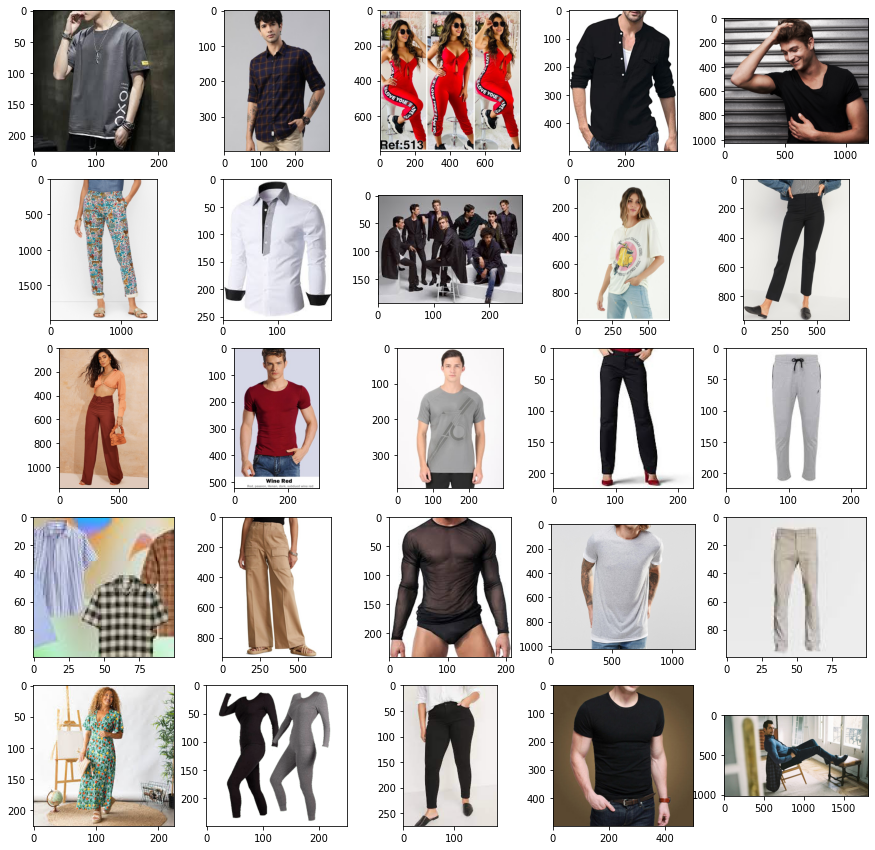

In [24]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/ropa/ropa'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [25]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/ropa
!mkdir dataset/defectos

In [31]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 45 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/defectos/Defectos'
carpeta_destino = '/content/dataset/defectos'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 45:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [32]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 45 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/ropa/ropa'
carpeta_destino = '/content/dataset/ropa'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 45:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [35]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/defectos | wc -l 
!ls /content/dataset/ropa | wc -l 

45
45


Found 72 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


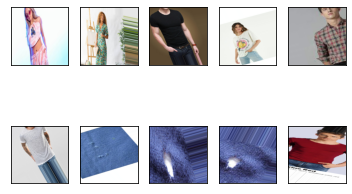

In [41]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [45]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [46]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [47]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')                          
])

In [49]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [58]:
#Compilar 
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [59]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs = EPOCAS, batch_size=32,
    validation_data = data_gen_pruebas
)

Epoch 1/50


InvalidArgumentError: ignored